# Planetary Eccentricity Table distribution fit
*Parse table from csv file*

In [42]:
from pandas import read_csv


df = read_csv('planetary_orbital_eccentricity.csv')
df.head()

,eccentricity,p,p_eccentric,p_conventional
0,0.8,0.004630,0.162037,0.0
1,0.7,0.013889,0.097222,0.0
2,0.6,0.027778,0.115741,0.0
3,0.5,0.046296,0.125000,0.0
4,0.4,0.069444,0.125000,0.0


## Discrete probabilities
*the p column contains probability of the dice rolls corresponding to the eccentricities*

In [43]:
x = df.eccentricity
y = df.p

y.sum()

1.0

*creating random sample of 1000 elements from given probabilities*

In [44]:
from random import choices

sample = choices(list(x), weights=list(y), k=1000)


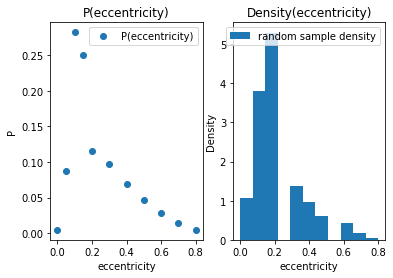

In [45]:
import matplotlib.pyplot as plt


_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(eccentricity)")
axs[0].plot(x, y, 'o', label='P(eccentricity)')
axs[0].set_xlabel('eccentricity')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(eccentricity)")
axs[1].hist(sample, density=True, bins=len(x), label='random sample density')
axs[1].set_xlabel('eccentricity')
axs[1].set_ylabel('Density')
axs[1].legend()

plt.show()

## Continuous random variable fit
*Fitting a truncated normal distribution to the random sample*

In [46]:

import numpy as np

xa, xb = x.min(), x.max()
mu = np.mean(sample)
sigma = np.std(sample)
a, b = (xa - mu) / sigma, (xb - mu) / sigma

a, b, mu, sigma 

(-1.369476274013634, 3.9891983124911703, 0.20445, 0.1492906477311958)

In [47]:
from scipy.stats import truncnorm
from scipy.stats import kstest

dist = truncnorm(a, b, mu, sigma)
r = kstest(sample, [a, b, mu, sigma], 'truncnorm')
r

KstestResult(statistic=0.25, pvalue=0.9086576490372212)

*Density function from the fitted continuous random variable*

In [48]:
y_pdf =  [dist.pdf(xi) for xi in x]

*Creating random sample of 1000 elements from the fitted continuous random variable*

In [49]:
fit_sample = dist.rvs(size=1000)

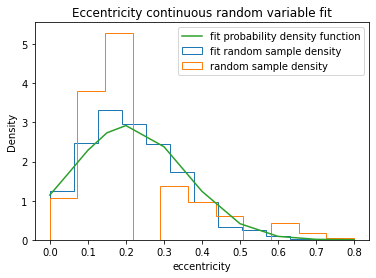

In [50]:
_, ax = plt.subplots()
ax.set_title(r"Eccentricity continuous random variable fit")
ax.hist(fit_sample, density=True, histtype='step', bins=len(x), label='fit random sample density')
ax.hist(sample, density=True, histtype='step', bins=len(x), label='random sample density')
ax.plot(x, y_pdf, '-', label='fit probability density function')
ax.set_xlabel('eccentricity')
ax.set_ylabel('Density')
ax.legend()
plt.show()

*All generated values in sample must be in interval [0, .8]*

In [51]:
all(v >= x.min() and v <= x.max() for v in fit_sample)

True

## Discrete probabilities with modifiers
*the p_eccentric and p_conventional columns contains modified probability of the dice rolls corresponding to the eccentricities the gas giant arrangement*

### Eccentric modifier

In [52]:
x_eccentric = df.eccentricity[df.p_eccentric > 0]
y_eccentric = df.p_eccentric[df.p_eccentric > 0]

y_eccentric.sum()

1.0

*creating random sample of 1000 elements from given probabilities*

In [53]:
sample_eccentric = choices(list(x_eccentric), weights=list(y_eccentric), k=1000)

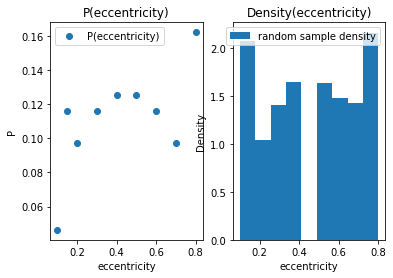

In [54]:
_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(eccentricity)")
axs[0].plot(x_eccentric, y_eccentric, 'o', label='P(eccentricity)')
axs[0].set_xlabel('eccentricity')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(eccentricity)")
axs[1].hist(sample_eccentric, density=True, bins=len(x_eccentric), label='random sample density')
axs[1].set_xlabel('eccentricity')
axs[1].set_ylabel('Density')
axs[1].legend()

### Conventional modifier

In [55]:
x_conventional = df.eccentricity[df.p_conventional > 0]
y_conventional = df.p_conventional[df.p_conventional > 0]

y_conventional.sum()

1.0

*creating random sample of 1000 elements from given probabilities*

In [56]:
sample_conventional = choices(list(x_conventional), weights=list(y_conventional), k=1000)

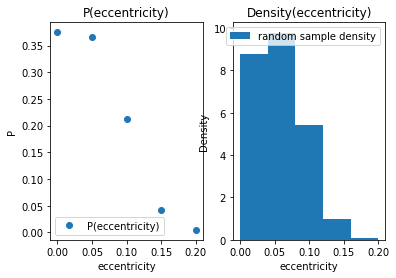

In [57]:
_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(eccentricity)")
axs[0].plot(x_conventional, y_conventional, 'o', label='P(eccentricity)')
axs[0].set_xlabel('eccentricity')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(eccentricity)")
axs[1].hist(sample_conventional, density=True, bins=len(x_conventional), label='random sample density')
axs[1].set_xlabel('eccentricity')
axs[1].set_ylabel('Density')
axs[1].legend()

## Continuous random variable fit on modified probabilities
*Fitting distributions to the random samples*

### Eccentric modifier
*Fitting a truncated normal distribution*

In [58]:
xa, xb = x_eccentric.min(), x_eccentric.max()
mu = np.mean(sample_eccentric)
sigma = np.std(sample_eccentric)
a, b = (xa - mu) / sigma, (xb - mu) / sigma

a, b, mu, sigma 

(-1.5707277613767705, 1.4329860289899539, 0.46605, 0.23304484010593327)

In [59]:
dist_moderate = truncnorm(a, b, mu, sigma)
r = kstest(sample_eccentric, [a, b, mu, sigma], 'truncnorm')
r

KstestResult(statistic=0.271, pvalue=0.8567136601244074)

*Density function from the fitted continuous random variable*

In [60]:
y_eccentric_pdf =  [dist_moderate.pdf(xi) for xi in x_eccentric]

*Creating random sample of 1000 elements from the fitted continuous random variable*

In [61]:
fit_sample_eccentric = dist_moderate.rvs(size=1000)

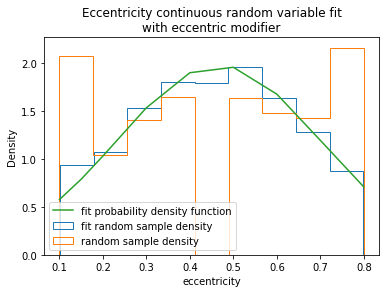

In [62]:
_, ax = plt.subplots()
ax.set_title(r"""Eccentricity continuous random variable fit
with eccentric modifier""")
ax.hist(fit_sample_eccentric, density=True, histtype='step', bins=len(x_eccentric), label='fit random sample density')
ax.hist(sample_eccentric, density=True, histtype='step', bins=len(x_eccentric), label='random sample density')
ax.plot(x_eccentric, y_eccentric_pdf, '-', label='fit probability density function')
ax.set_xlabel('eccentricity')
ax.set_ylabel('Density')
ax.legend()
plt.show()

*All generated values in sample must be in interval [.1, .8]*

In [63]:
all(v >= x_eccentric.min() and v <= x_eccentric.max() for v in fit_sample_eccentric)

True

### Conventional separation modifier
*Fitting a truncated normal distribution*

In [64]:
xa, xb = x_conventional.min(), x_conventional.max()
mu = np.mean(sample_conventional)
sigma = np.std(sample_conventional)
a, b = (xa - mu) / sigma, (xb - mu) / sigma

a, b, mu, sigma

(-1.1031415778324567,
 3.522189985406355,
 0.047700000000000006,
 0.0432401433855162)

In [65]:
dist_close = truncnorm(a, b, mu, sigma)
r = kstest(sample_conventional, [a, b, mu, sigma], 'truncnorm')
r

KstestResult(statistic=0.4, pvalue=0.44092082902411933)

*Density function from the fitted continuous random variable*

In [66]:
y_conventional_pdf =  [dist_close.pdf(xi) for xi in x_conventional]

*Creating random sample of 1000 elements from the fitted continuous random variable*

In [67]:
fit_sample_conventional = dist_close.rvs(size=1000)

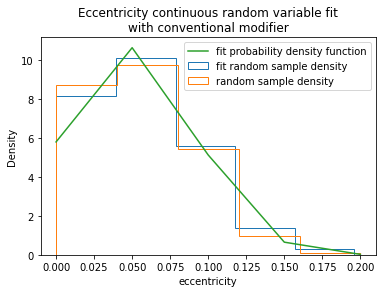

In [68]:
_, ax = plt.subplots()
ax.set_title(r"""Eccentricity continuous random variable fit
with conventional modifier""")
ax.hist(fit_sample_conventional, density=True, histtype='step', bins=len(x_conventional), label='fit random sample density')
ax.hist(sample_conventional, density=True, histtype='step', bins=len(x_conventional), label='random sample density')
ax.plot(x_conventional, y_conventional_pdf, '-', label='fit probability density function')
ax.set_xlabel('eccentricity')
ax.set_ylabel('Density')
ax.legend()
plt.show()

*All generated values in sample must be in interval [0, .2]*

In [69]:
all(v >= x_conventional.min() and v <= x_conventional.max() for v in fit_sample_conventional)

True